## Load in Clustered data

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/clustered_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

### Plot data

In [4]:
ratios = [row[-2] for row in bound_data]
ratios_inverse = [1.0/obs for obs in ratios]

In [5]:
groups = [0, 1, 2]
groups_order = [1, 0, 2]
grouped_ratios = [[ratios_inverse[i] for i in range(len(ratios_inverse)) if bound_data[i][-1] == g] for g in groups_order]

In [28]:
group_means = [round(sum(grouped_ratios[i])/len(grouped_ratios[i]), 4) for i in groups_order]
Group_names = ['B', 'A', 'C']
colours = ['forestgreen', 'orangered', 'darkcyan']
overall_mean = round(sum(ratios_inverse)/len(ratios_inverse), 4)
labs = ['Group ' + Group_names[i] + ', mean = ' + str(group_means[i]) for i in range(len(Group_names))]
labs_order = [labs[1], labs[0], labs[2]]

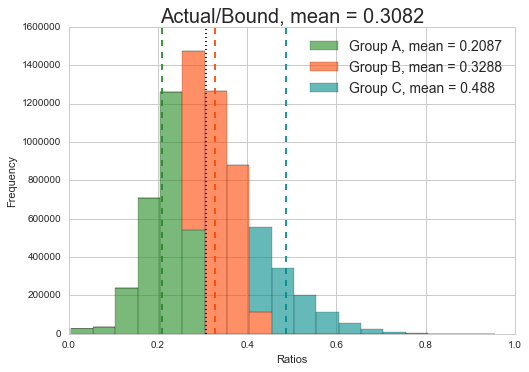

In [29]:
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0
fig, ax = plt.subplots()
plt.hist(grouped_ratios, bins=bins, width=width, alpha=0.6, stacked=True, color=colours, label=labs)
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(labs_order, fontsize=14)
ax.set_title('Actual/Bound, mean = ' + str(overall_mean), fontsize=20)
plt.vlines(group_means, 0, 1600000, color=[colours[i] for i in groups_order], linestyle="dashed")
plt.vlines(overall_mean, 0, 1600000, color='black', linestyle="dotted")
plt.show()